In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')


In [74]:
from sklearn.model_selection import train_test_split

full_set = pd.read_csv('data/kc_house_data.csv')

full_set['waterfront'] = full_set['waterfront'].fillna(value='NO')

#pricey = full_set.loc[full_set.price > 1e6].index

#full_set = full_set.drop(pricey)

X_train, X_test, y_train, y_test = train_test_split( full_set.drop(columns = 'price' , axis = 1) , full_set['price'] , test_size=0.2) #, random_state = 123456789)

training_data = pd.concat([X_train, y_train], axis = 1)

display(training_data)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
14700,3902100205,4/17/2015,3,1.75,1190,4500,1.0,NO,NONE,Average,...,1190,0.0,1922,2012.0,98116,47.5576,-122.388,1820,4500,515000.0
15436,1423089134,8/15/2014,3,2.25,2680,41250,2.0,NO,NONE,Average,...,2680,0.0,1984,0.0,98045,47.4817,-121.749,1940,47044,590000.0
2880,5210200107,11/25/2014,4,1.75,1730,6500,1.0,NO,NONE,Average,...,1250,480.0,1945,NaN,98115,47.6982,-122.282,1910,8100,700000.0
2310,943100262,10/30/2014,3,1.00,1190,11120,1.0,NO,NONE,Average,...,1190,0.0,1947,0.0,98024,47.5687,-121.898,1230,12720,260000.0
3984,2768301217,5/6/2015,3,2.50,1980,1873,2.0,NO,NONE,Average,...,1470,510.0,1996,0.0,98107,47.6659,-122.369,1500,1873,580000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,4206901200,8/25/2014,4,1.50,2220,4000,1.5,NO,NONE,Average,...,1970,250.0,1925,0.0,98105,47.6564,-122.325,1984,4000,785000.0
1975,4379400560,5/29/2014,3,2.50,2390,4555,2.0,NO,NONE,Average,...,2390,0.0,2006,0.0,98074,47.6199,-122.025,2540,4500,695000.0
1393,8567300140,7/23/2014,4,2.75,3410,35040,2.0,NO,NONE,Average,...,3410,0.0,1984,0.0,98038,47.4054,-122.030,2580,37263,545000.0
622,9500900135,10/21/2014,3,1.50,1210,10588,1.0,NO,NONE,Good,...,1210,0.0,1958,0.0,98002,47.2876,-122.212,1408,10588,200000.0


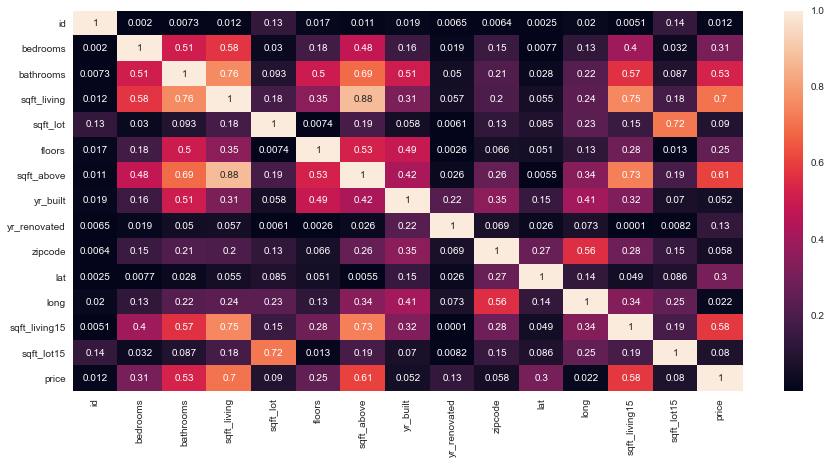

In [75]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(training_data.corr().abs(), annot = True, ax = ax);

<AxesSubplot:>

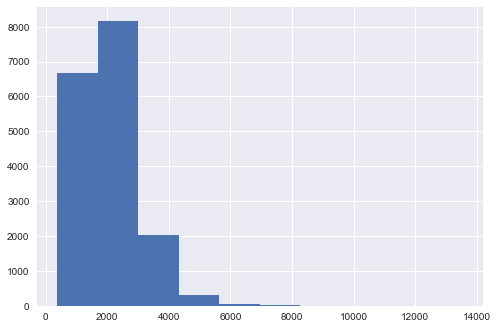

In [76]:
training_data['sqft_living'].hist()

<AxesSubplot:>

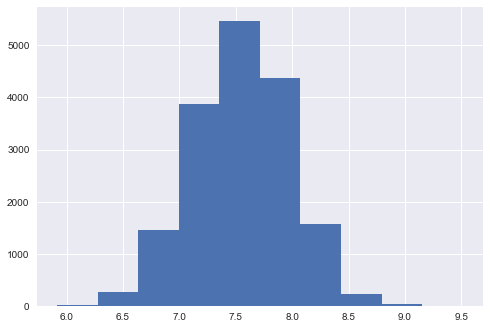

In [77]:
np.log(training_data['sqft_living']).hist()

<AxesSubplot:>

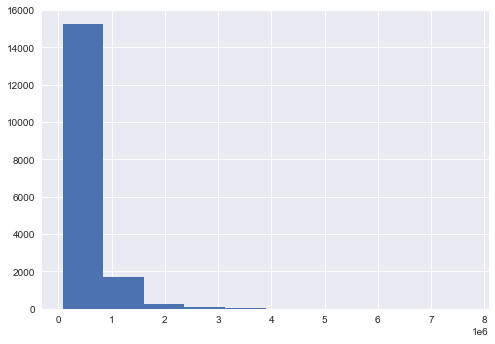

In [78]:
training_data['price'].hist()

<AxesSubplot:>

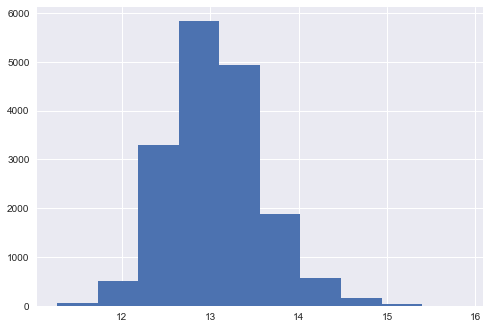

In [79]:
np.log(training_data['price']).hist()

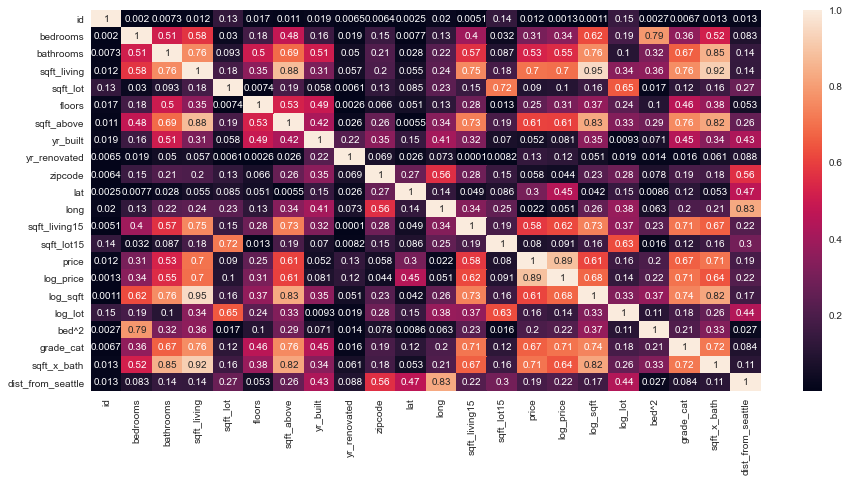

In [80]:
feature_testing = training_data.copy()

fig,ax = plt.subplots(figsize = (15,7))



#log X,y
feature_testing['log_price'] = np.log(feature_testing['price'])
feature_testing['log_sqft'] = np.log(feature_testing['sqft_living'])
feature_testing['log_lot'] = np.log(feature_testing['sqft_lot'])

feature_testing['bed^2'] = feature_testing['bedrooms'] ** 2
feature_testing['grade_cat'] = feature_testing['grade'].str.split().str[0].astype(int)


feature_testing['sqft_x_bath'] = feature_testing['sqft_living'] * feature_testing['bathrooms']

feature_testing['dist_from_seattle'] = np.sqrt( (feature_testing['lat'] - 47.6050) ** 2 + (feature_testing['long'] + 122.3344) ** 2)


ax = sns.heatmap(feature_testing.corr().abs(), annot = True, ax = ax);

In [81]:
pairs_df = feature_testing.drop(columns = 'price', axis = 1).corr().abs().stack().reset_index().sort_values(0, ascending = False)
pairs_df['Pairs'] = list(zip(pairs_df.level_0, pairs_df.level_1))
pairs_df.set_index(['Pairs'], inplace = True)
pairs_df.drop(columns = ['level_0', 'level_1'], inplace = True)
pairs_df.columns = ['CC']
pairs_df.drop_duplicates(inplace = True)
pairs_df[(pairs_df.CC > 0.6) & (pairs_df.CC < 1)]

,CC
Pairs,
"(log_sqft, sqft_living)",0.953221
"(sqft_living, sqft_x_bath)",0.924794
"(sqft_above, sqft_living)",0.876824
"(bathrooms, sqft_x_bath)",0.849877
"(sqft_above, log_sqft)",0.831924
"(dist_from_seattle, long)",0.828601
"(log_sqft, sqft_x_bath)",0.823255
"(sqft_x_bath, sqft_above)",0.820628
"(bedrooms, bed^2)",0.785329


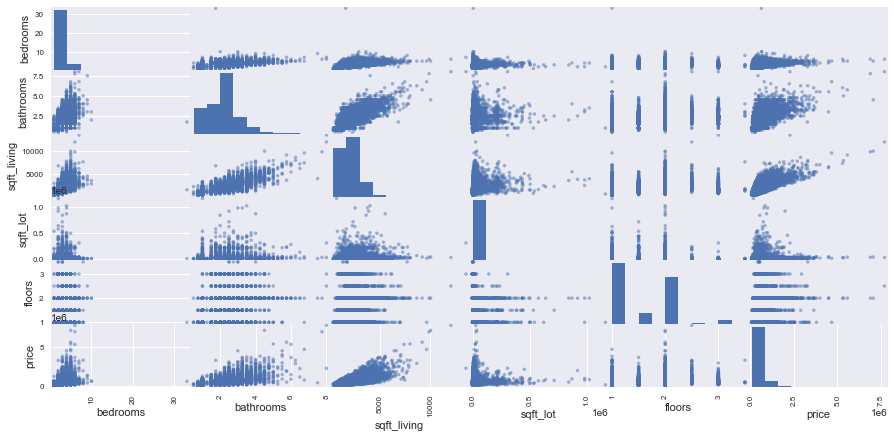

In [82]:
pd.plotting.scatter_matrix(feature_testing[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']], figsize = (15,7));

# Baseline

In [83]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dummy_regr = DummyRegressor(strategy="mean")

X = training_data['bathrooms'].values.reshape(-1,1)
y = y_train

dummy_regr.fit(X, y)
print(dummy_regr.score(X, y))

predicted_y = dummy_regr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.0
372083.38512937614


# Sqft only

In [84]:
X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.49598827047732297
264156.072867264


In [85]:
import statsmodels.api as sm

X = training_data['sqft_living'].values.reshape(-1,1)
y = y_train

results = sm.OLS(y, sm.add_constant(X)).fit()

results.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.700e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:52:44   Log-Likelihood:            -2.4021e+05
No. Observations:               17277   AIC:                         4.804e+05
Df Residuals:                   17275   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.098e+04   4961.267    -10.277      0.000   -6.07e+04   -4.13e+04
x1           284.3831      2.181    130.384      0.000     280.108     288.658
==============================================================================
Omnibus:                    12103.559   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           481047.156
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      28.198   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
X = training_data[['sqft_living','bathrooms']]
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4960840169498495
264130.98097755294


# Log sqft (worse)

In [87]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.3724950991613061
294746.6234688616


# Log price (worse)

In [88]:
X = feature_testing['sqft_living'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.4857769041507789
0.3785165853723029


# Log sqft log price (worse)

In [89]:
X = feature_testing['log_sqft'].values.reshape(-1,1)
y = feature_testing['log_price']

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.45688532425502226
0.3890047401723037


# Sqft X Bath (better)

In [90]:
X = feature_testing['sqft_x_bath'].values.reshape(-1,1)
y = y_train

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

print(np.linalg.cond(X))

0.5041299524345471
262013.83009689726
1.0


# Bed ^2 (worse)

In [91]:
from sklearn.preprocessing import PolynomialFeatures

X = feature_testing['bedrooms'].values.reshape(-1,1)
y = feature_testing['price']

poly = PolynomialFeatures(2)
poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.09443020049592465
354079.87468353775


# sqft X bath + log_lot (slightly better)

In [92]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train



lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)


0.5047008683802622
261862.95291059153


# Polynomial

In [93]:
X = feature_testing[['sqft_x_bath','log_lot']]
y = y_train

new_x = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(new_x, y)

print(lr.score(new_x,y))

predicted_y = lr.predict(new_x)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.5067592715606863
261318.25104018717


# Distance from seattle added to polynomial

R^2:  0.6374946311706242
Adjusted R^2 : 0.6370744812299318
RMSE:  224025.52261534883
Median Error:  20136.621012005955


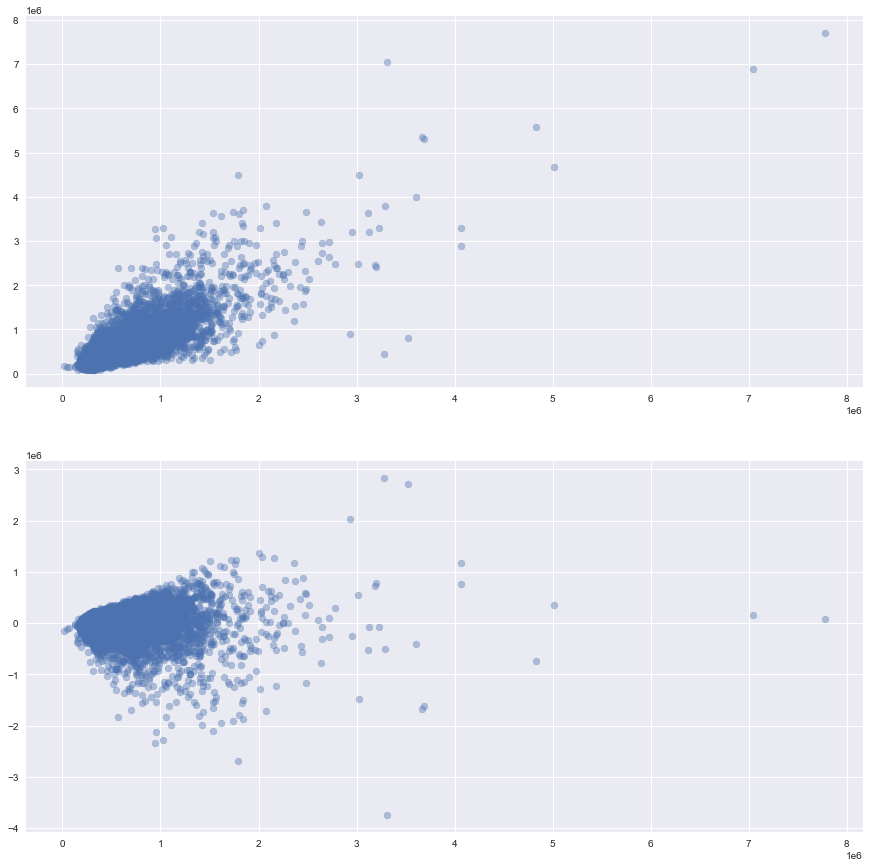

In [108]:
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']]
y = y_train

poly = PolynomialFeatures(3)
X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))
predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

#print(np.linalg.cond(X))

fig, axs = plt.subplots(2, figsize = (15,15));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)

# Tried OHE with waterfront

In [95]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse = False)
cat_X = ohe.fit_transform(feature_testing['waterfront'].values.reshape(-1,1))
cat_df = pd.DataFrame(data = cat_X)
X = feature_testing[['sqft_x_bath','dist_from_seattle','yr_built']].copy()
X['waterfront'] = cat_df.values
y = y_train



#poly = PolynomialFeatures(3)
#X = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X, y)

print(lr.score(X,y))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print(rmse)

0.6161583184653199
230524.10481867925


# Ordinal Encoder

In [96]:
from sklearn.preprocessing import OrdinalEncoder

x_enc = feature_testing['grade']

x_enc = x_enc.str.split().str[0]

enc = OrdinalEncoder()

test = enc.fit_transform(X)


R^2:  0.7598666063968746
Adjusted R^2 : 0.7590856847916612
RMSE:  182333.53705307984
Median Error:  16463.90939426422
Condition Number:  1.7975186136983654e+16


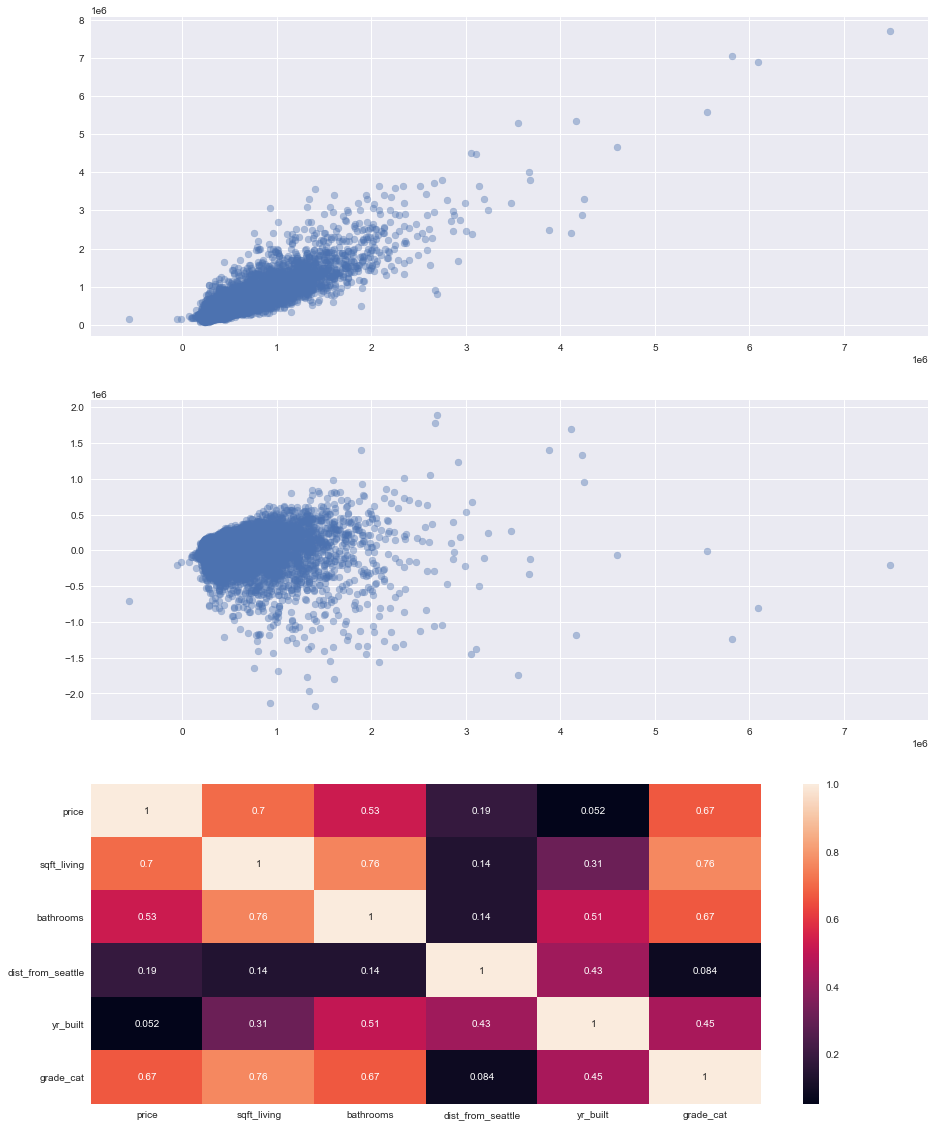

In [107]:
X_pre = feature_testing[['sqft_living','bathrooms','dist_from_seattle','yr_built','grade_cat']]

y = y_train

poly = PolynomialFeatures(3)
X = poly.fit_transform(X_pre)

lr = LinearRegression()
lr.fit(X, y)

print('R^2: ',lr.score(X,y))
print('Adjusted R^2 :', 1 - ( 1-lr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

predicted_y = lr.predict(X)

rmse = np.sqrt(mean_squared_error(predicted_y,y))
print('RMSE: ',rmse)
print("Median Error: ", np.median(predicted_y - y))

print('Condition Number: ',np.linalg.cond(X))

fig, axs = plt.subplots(3, figsize = (15,20));

axs[0].scatter(predicted_y, y, alpha = 0.4)
axs[1].scatter(predicted_y, predicted_y - y, alpha = 0.4);
sns.heatmap(pd.concat([y_train, X_pre], axis = 1).corr().abs(), annot = True, ax = axs[2]);
#ax.hlines(xmin = min(predicted_y), xmax = max(predicted_y), y = 0, color = 'r')
#ax.plot(np.linspace(0,6e6, 17277), predicted_y)